In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
# import seaborn as sns

dataset = pd.read_csv("../data/logfile-v4.csv", delimiter=";")
dataset.head()

,time,datacenter_name,host_id,type,active,number_of_pes,available_pes,mips,available_mips,ram,available_ram,bw,available_bw,power_model,vms,Unnamed: 15
0,300.01,Datacenter_1,0,host,True,4,1,10000,0.0,160000,83880.0,10000,111.0,"93.7,97.0,101.0,105.0,110.0,116.0,121.0,125.0,...","2,1000.0,8388.0,12.0:2,1000.0,8388.0,12.0:2,10...",NaN
1,600.01,Datacenter_1,0,host,True,4,1,10000,0.0,160000,83880.0,10000,111.0,"93.7,97.0,101.0,105.0,110.0,116.0,121.0,125.0,...","2,1000.0,8388.0,12.0:2,1000.0,8388.0,12.0:2,10...",NaN
2,900.01,Datacenter_1,0,host,True,4,1,10000,0.0,160000,83880.0,10000,111.0,"93.7,97.0,101.0,105.0,110.0,116.0,121.0,125.0,...","2,1000.0,8388.0,12.0:2,1000.0,8388.0,12.0:2,10...",NaN
3,1200.01,Datacenter_1,0,host,True,4,1,10000,0.0,160000,83880.0,10000,111.0,"93.7,97.0,101.0,105.0,110.0,116.0,121.0,125.0,...","2,1000.0,8388.0,12.0:2,1000.0,8388.0,12.0:2,10...",NaN
4,1500.01,Datacenter_1,0,host,True,4,1,10000,0.0,160000,83880.0,10000,111.0,"93.7,97.0,101.0,105.0,110.0,116.0,121.0,125.0,...","2,1000.0,8388.0,12.0:2,1000.0,8388.0,12.0:2,10...",NaN


2200.0 Workloads at datacenter 'Datacenter_1'.


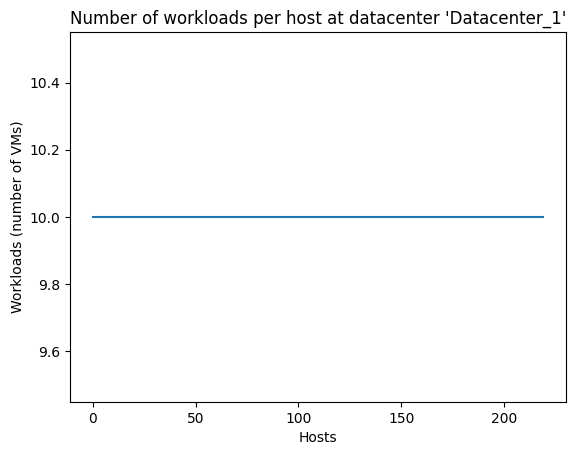

2200.0 Workloads at datacenter 'Datacenter_2'.


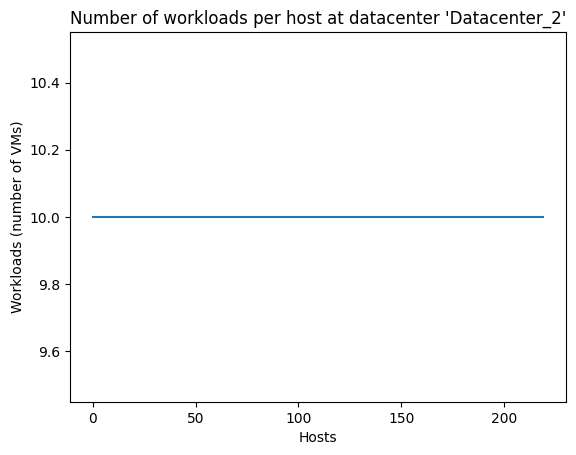

2200.0 Workloads at datacenter 'Datacenter_3'.


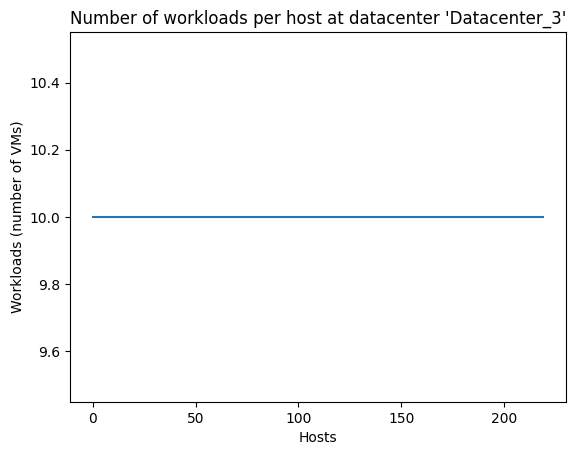

2034.0 Workloads at datacenter 'Datacenter_4'.


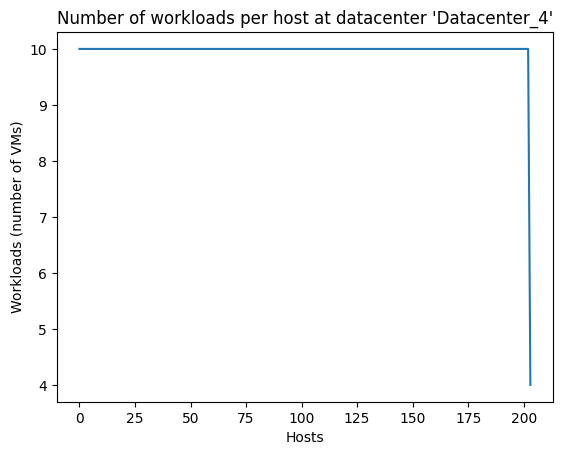

The cloud provider has 8634.0 workloads running.


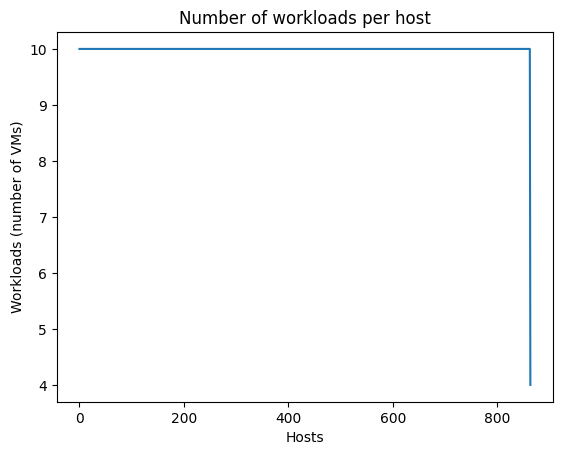

In [2]:
labels = np.unique(dataset['datacenter_name'])
workload_per_datacenter = np.array([])
workload_per_host = np.array([])
for i in range(len(labels)):
    workload_per_datacenter_per_host = np.array([])
    
    for index, sample in dataset[(dataset['datacenter_name'] == labels[i]) & (dataset['time'] == 300.01)].iterrows():
        if pd.notna(sample['vms']):
            workload_per_host = np.append(workload_per_host, len(sample['vms'].split(":"))-1)
            workload_per_datacenter_per_host = np.append(workload_per_datacenter_per_host, len(sample['vms'].split(":"))-1)
    workload_per_datacenter = np.append(workload_per_datacenter, sum(workload_per_datacenter_per_host))
    
    print(f"{sum(workload_per_datacenter_per_host)} Workloads at datacenter '{labels[i]}'.")
    plt.plot(np.arange(len(workload_per_datacenter_per_host)), workload_per_datacenter_per_host, label="Workloads per host")
    plt.xlabel("Hosts")
    plt.ylabel("Workloads (number of VMs)")
    plt.title(f"Number of workloads per host at datacenter '{labels[i]}'")
    #plt.legend()
    plt.show()

print(f"The cloud provider has {sum(workload_per_datacenter)} workloads running.")

plt.plot(np.arange(len(workload_per_host)), workload_per_host, label="Workloads per host")
plt.xlabel("Hosts")
plt.ylabel("Workloads (number of VMs)")
plt.title("Number of workloads per host")
#plt.legend()
plt.show()